In [2]:
# Packages:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from urllib.request import urlopen
import json
import datetime
import numpy as np
import warnings
from textblob import TextBlob
import re
from wordcloud import WordCloud
import scipy.stats as st
import scipy
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

In [3]:
df = pd.read_csv('../data/processed/trader_cleaned.csv')
df.head()

,Date,Price,Price_scaled,Price_delta,Tweets,Agg_count,Agg_retweet,Agg_favorite,Subjectivity_mean,Polarity_mean,Polarity_scaled,Polarity_delta,Favorite_scaled,Retweet_scaled
0,2021-12-02,295.75,0.887446,NaN,Great quote. stolen &amp; disseminatedTalk i...,20.0,28.0,64.0,0.339627,0.241893,0.379331,0.247805,0.201258,0.000721
1,2021-12-01,287.25,0.813853,-0.073593,Black Sea Futures:\n\n🌾Black Sea Wheat- 75.5kt...,13.0,30.0,31.0,0.164359,-0.000897,0.131526,-0.014569,0.097484,0.000773
2,2021-11-30,285.50,0.798701,-0.015152,_Cycles You can never have too much socks… 🧦 ...,20.0,16.0,74.0,0.241554,0.013376,0.146095,-0.049080,0.232704,0.000412
3,2021-11-29,297.50,0.902597,0.103896,Not yet. It’ll be higher in January: GASC- Bi...,28.0,2136.0,124.0,0.287041,0.061463,0.195174,-0.113520,0.389937,0.055027
4,2021-11-26,302.75,0.948052,0.045455,💥 🇪🇬 🌾 GASC has announced a wheat 🌾 tender for...,9.0,3.0,26.0,0.399537,0.172685,0.308694,0.204819,0.081761,0.000077


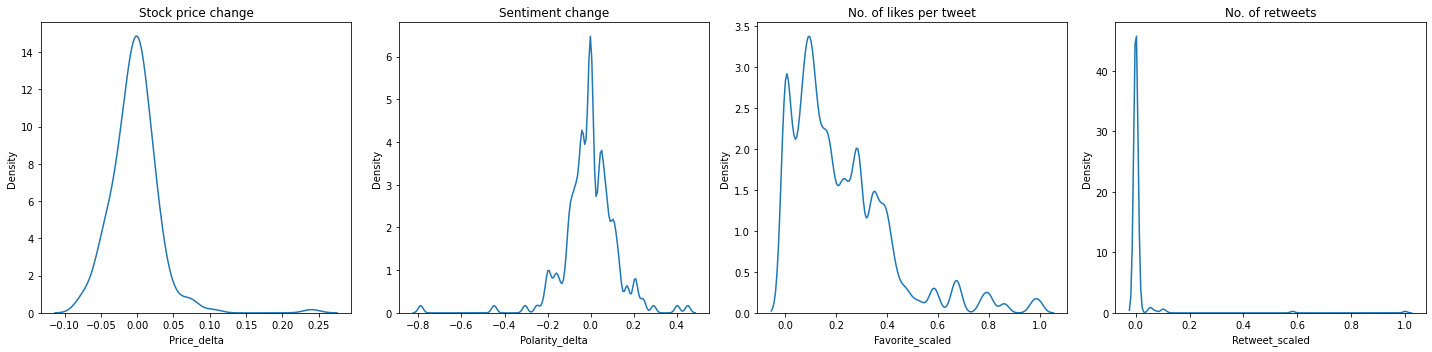

In [20]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 5))

sns.kdeplot(ax=ax1, x=df['Price_delta'], bw_adjust=1).set_title('Stock price change')
sns.kdeplot(ax=ax2, x=df['Polarity_delta'], bw_adjust=0.27).set_title('Sentiment change')
sns.kdeplot(ax=ax3, x=df['Favorite_scaled'], bw_adjust=0.27).set_title('No. of likes per tweet')
sns.kdeplot(ax=ax4, x=df['Retweet_scaled'], bw_adjust=0.27).set_title('No. of retweets')

plt.tight_layout()

In [162]:
df.describe()

,Price,Price_scaled,Price_delta,Agg_count,Agg_retweet,Agg_favorite,Subjectivity_mean,Polarity_mean,Polarity_scaled,Polarity_delta,Favorite_scaled,Retweet_scaled
count,735.000000,735.000000,734.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,19.458163,0.234492,0.000156,4.229932,333.526531,1937.985034,0.324213,0.188498,0.327838,0.000191,0.005212,0.005807
std,10.087239,0.193279,0.030915,5.349902,2188.086998,13967.776752,0.268322,0.196003,0.249892,0.145938,0.037568,0.038096
min,7.220000,0.000000,-0.163058,0.000000,0.000000,0.000000,0.000000,-0.400000,0.000000,-0.595238,0.000000,0.000000
25%,10.400000,0.060931,-0.007233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.042035,0.000000,0.000000
50%,17.420000,0.195440,0.000000,2.000000,105.000000,661.000000,0.393750,0.187374,0.419553,0.000000,0.001778,0.001828
75%,24.605001,0.333110,0.006323,7.000000,300.000000,1720.000000,0.525228,0.317731,0.512665,0.047527,0.004626,0.005223
max,59.410000,1.000000,0.299866,40.000000,57436.000000,371803.000000,1.000000,1.000000,1.000000,0.630952,1.000000,1.000000


In [12]:
#from scipy.stats import boxcox

#df['transformed_return'], lam = boxcox(df["Return"])


In [21]:
numeric_df = df.filter(items=['Price_scaled','Price_delta', 'Polarity_delta', 'Favorite_scaled', 'Retweet_scaled'])
corr1 = numeric_df.corr()
corr2 = numeric_df.corr(method='spearman')

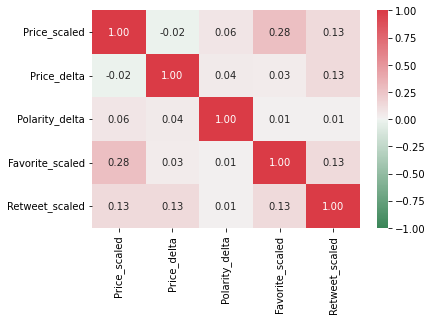

In [27]:
sns.heatmap(corr1, annot=True, cmap=sns.diverging_palette(140, 10, as_cmap=True), fmt='.2f', vmin=-1, vmax=1)
plt.show()

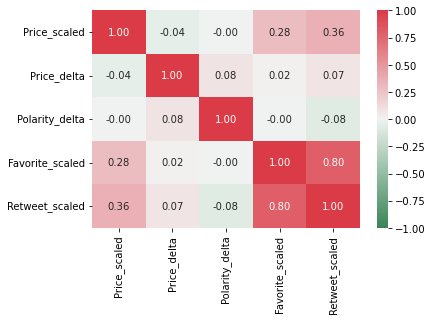

In [28]:
sns.heatmap(corr2, annot=True, cmap=sns.diverging_palette(140, 10, as_cmap=True), fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [29]:
print("H0: the changes in stock market prices are similar on average compared to the changes in CEO's Twitter sentiment") 
print("H1: the changes in stock market prices are different on average compared to the changes in CEO's Twitter sentiment")

statistic = st.ttest_ind(df['Price_delta'], df['Polarity_delta'], axis=0, equal_var=False, alternative='two-sided', nan_policy='omit')[0]
pvalue = st.ttest_ind(df['Price_delta'], df['Polarity_delta'], axis=0, equal_var=False, alternative='two-sided', nan_policy='omit')[1]

print('statistic = ',statistic)
print('pvalue = ',pvalue)

if pvalue<= 0.05:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')
    

H0: the changes in stock market prices are similar on average compared to the changes in CEO's Twitter sentiment
H1: the changes in stock market prices are different on average compared to the changes in CEO's Twitter sentiment
statistic =  0.013398151788506684
pvalue =  0.9893218790033541
We fail to reject the null hypothesis


C:\Users\Amalia\anaconda3\envs\dstoolkit\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


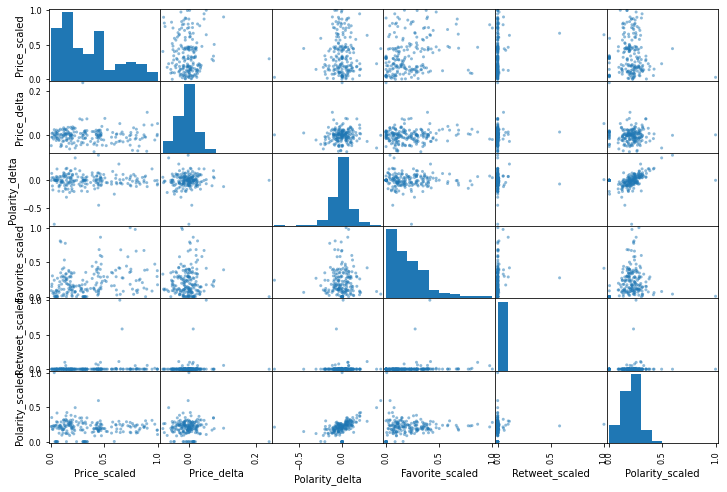

In [30]:
from pandas.plotting import scatter_matrix
df_sm = df[['Price_scaled','Price_delta', 'Polarity_delta','Favorite_scaled', 'Retweet_scaled', 'Polarity_scaled']]
df_sm.dropna(inplace=True)
scatter_matrix(df_sm, figsize=(12,8));

In [133]:
scipy.stats.shapiro(df_sm['Price_delta'])

ShapiroResult(statistic=0.7528862953186035, pvalue=1.0787124919854712e-31)

In [134]:
scipy.stats.shapiro(df_sm['Polarity_delta'])

ShapiroResult(statistic=0.9028864502906799, pvalue=3.5576222274403105e-21)

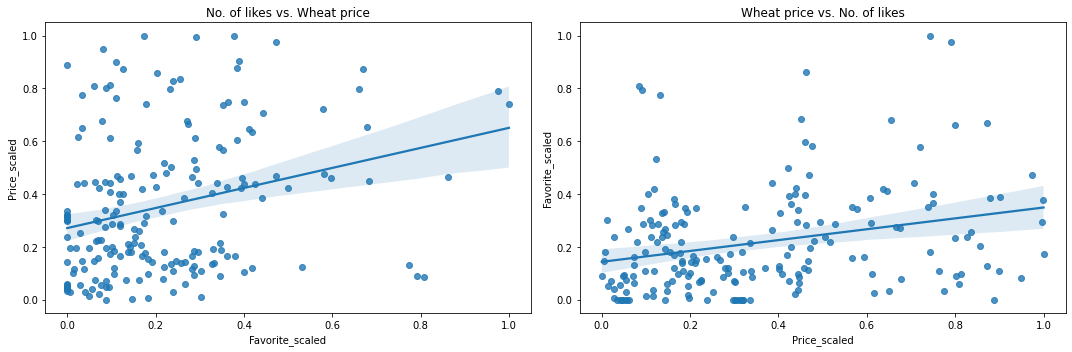

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
sns.regplot(data = df_sm, x='Price_scaled', y='Favorite_scaled', lowess=False, ax=ax2).set(title='Wheat price vs. No. of likes')
sns.regplot(data = df_sm, x='Favorite_scaled', y='Price_scaled', lowess=False, ax=ax1).set(title='No. of likes vs. Wheat price')

plt.tight_layout()

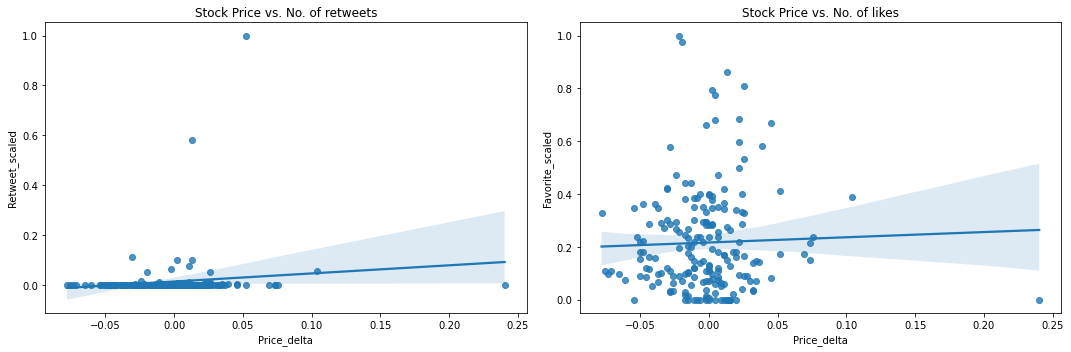

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
sns.regplot(data = df_sm, x='Price_delta', y='Retweet_scaled', lowess=False, ax=ax1). set(title='Stock Price vs. No. of retweets')
sns.regplot(data = df_sm, x='Price_delta', y='Favorite_scaled', lowess=False, ax=ax2). set(title='Stock Price vs. No. of likes')

plt.tight_layout()

In [33]:
X = df_sm['Price_delta']
y = df_sm['Polarity_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Polarity_delta   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3788
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.539
Time:                        13:49:01   Log-Likelihood:                 134.45
No. Observations:                 195   AIC:                            -264.9
Df Residuals:                     193   BIC:                            -258.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0040      0.009     -0.451      

In [154]:
X = df_sm['Polarity_delta']
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8654
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.353
Time:                        19:32:26   Log-Likelihood:                 1511.2
No. Observations:                 734   AIC:                            -3018.
Df Residuals:                     732   BIC:                            -3009.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0002      0.001      0.

In [35]:
X = df_sm[['Favorite_scaled']]
y = df_sm['Price_scaled']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Price_scaled   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     16.33
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           7.66e-05
Time:                        13:49:23   Log-Likelihood:                -9.0380
No. Observations:                 195   AIC:                             22.08
Df Residuals:                     193   BIC:                             28.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2712      0.027     

In [156]:
X = df_sm[['Retweet_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     17.67
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           2.95e-05
Time:                        19:33:53   Log-Likelihood:                 1519.5
No. Observations:                 734   AIC:                            -3035.
Df Residuals:                     732   BIC:                            -3026.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0009      0.001      0.

In [172]:
X = df_sm[['Retweet_scaled', 'Polarity_delta', 'Favorite_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     8.504
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.48e-05
Time:                        12:58:57   Log-Likelihood:                 1523.4
No. Observations:                 734   AIC:                            -3039.
Df Residuals:                     730   BIC:                            -3020.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0007      0.001     

In [36]:
X = df_sm[['Retweet_scaled', 'Polarity_delta', 'Favorite_scaled']]
y = df_sm['Price_scaled']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Price_scaled   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     6.210
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           0.000478
Time:                        13:54:41   Log-Likelihood:                -7.8844
No. Observations:                 195   AIC:                             23.77
Df Residuals:                     191   BIC:                             36.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2715      0.027     

In [180]:
X = df_sm[['Polarity_delta', 'Favorite_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     11.20
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.62e-05
Time:                        13:02:23   Log-Likelihood:                 1521.8
No. Observations:                 734   AIC:                            -3038.
Df Residuals:                     731   BIC:                            -3024.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0009      0.001     